In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

### Using the dataset that comes with sklearn, the classic Iris dataset

In [2]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data[0:100, :2]  # we only take the first two features.
y = iris.target[0:100]

check the shape of the input

In [3]:
X.shape

(100, 2)

check the y values

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
from sklearn.model_selection import train_test_split


# split data train 80 % and test 20 % this function shuffles the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

# Plot the Train data to check if it is linearly separable

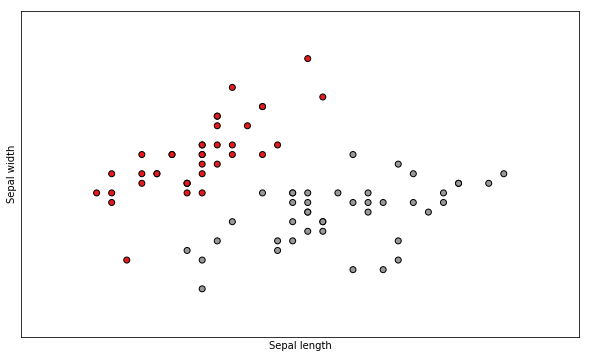

In [4]:

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(10, 6));
plt.clf();

# Plot the training points
# Plot the training points

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k');


plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);
plt.xticks(());
plt.yticks(());

Since it seems linear separable, if we use a learning rate small enough, we can classify the samples with a simple Perceptron

# Simple implementation of a Perceptron learning Algorithm 



Initialize the weights $w_i$ and the bias _$b$ 

For each sample $(x_i, y_i)$ do:

1 - Calculate the $y_{pred_i} = f(\sum_i^D{x_iw_i} + b)$, where $f$ is the step function for classification.

2 - Calculate the $ error = y_i - y_{pred_i}$

3- Update the weights  $w_i = w_i + \lambda*error*x_i$

4- Update the bias  $b_i = b_i + \lambda*error$

Repeat the process $epoch$ times.
The update of the weights and bias is made after every sample.


In [5]:
class Perceptron(object):
    '''
    Params:
    lr : Learning rate
    n_iter: Iterations over the training set
    
    Attr
    w_: vector of weights generated by the training
    err_: mispredictions in every epoch
    '''
    def __init__(self,eta=0.01,epoch=100):
        self.eta=eta
        self.epoch=epoch
    
    def fit(self,X,y):
        '''
        X.shape = number of samples x number of features
        y = target value
        '''
        #self.w_ = np.zeros(1+X.shape[1])
        self.w_ = np.random.rand(1,1+X.shape[1])[0]
        #self.w_=np.array([1,1,1])
        print(self.w_)
        
        self.err_ = []
        
        
        for i in range(self.epoch):
            errors=0
            #print("epoch",i)
            for x_i, target in zip(X,y):
                #print(self.w_)
                prediction=self.predict(x_i)
                error=target-prediction                
                self.w_[1:] = self.w_[1:] + (self.eta*error*x_i) # Weights
                self.w_[0] = self.w_[0] + self.eta*error # Bias
                errors = errors + int(error!=0)
            
            self.err_.append(errors)
        print(self.w_)
        return self
    
    def net_input_function(self,X):
        value=np.dot(X,self.w_[1:])+self.w_[0]
        #print(value)
        return value
    
    def predict(self,X):
        
        return np.where(self.net_input_function(X)>=0.0,1,0)
     
        

In [6]:
rate=0.01
epoch=50

[0.43405374 0.65803054 0.05519912]
[ 0.14405374  0.39503054 -0.73080088]
Weights: [ 0.14405374  0.39503054 -0.73080088]


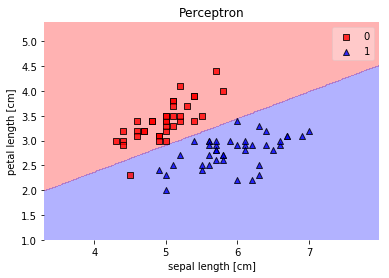

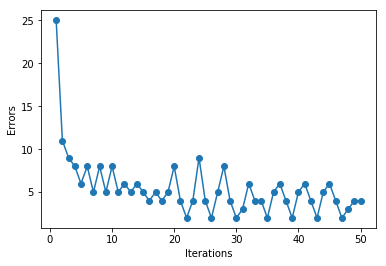

In [9]:
pn = Perceptron(eta=rate,epoch=epoch)
pn.fit(X_train,y_train)

print('Weights: %s' % pn.w_)
plot_decision_regions(X_train, y_train, clf=pn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(pn.err_)+1), pn.err_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.show()

In [10]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

Accuracy is:  1.0


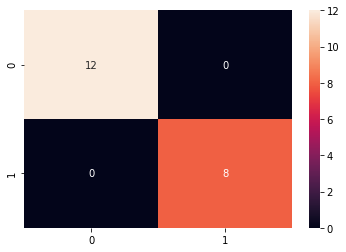

In [11]:
ac = accuracy_score(y_test,pn.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,pn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d");

# Comparing with sklearn implementation

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
skpc=Perceptron(eta0=rate,max_iter=epoch)
skpc.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

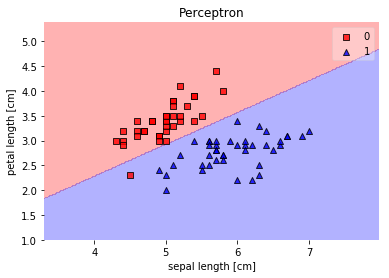

In [14]:
skpc.coef_
plot_decision_regions(X_train, y_train, clf=skpc)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()



In [15]:
print(skpc.intercept_,skpc.coef_)

[-0.18] [[ 0.397 -0.618]]


Accuracy is:  1.0


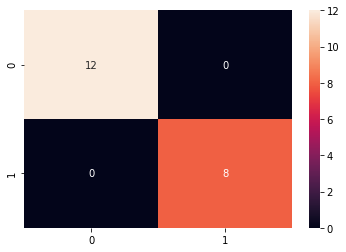

In [17]:
ac = accuracy_score(y_test,skpc.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,skpc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d");

Ok ! Seems close enough! we have the code of a functional perceptron. However, since the perceptron is a very simple linear classifier its use is limited to the distribution of the data.